<a href="https://colab.research.google.com/github/jmclaughlin0/haemorrhage/blob/main/Basic_Haemorrhage_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Inspection

This notebook's objective is to try and identify haemhorrages in CT heads

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import cv2
import tensorflow as tf

In [2]:
# Lets load in the data set

labels = pd.read_csv('/content/drive/MyDrive/Colab Data/Haemhorrage/labels.csv', index_col=0)


In [3]:
labels.head()

,hemorrhage
id,
0,1
1,1
2,1
3,1
4,1


In [4]:
labels.columns.values

array([' hemorrhage'], dtype=object)

In [5]:
labels.rename(columns={' hemorrhage': 'haemorrhage'}, inplace = True)

In [6]:
labels.columns.values

array(['haemorrhage'], dtype=object)

[Text(0.5, 1.0, 'Haemorrhage Distribution')]

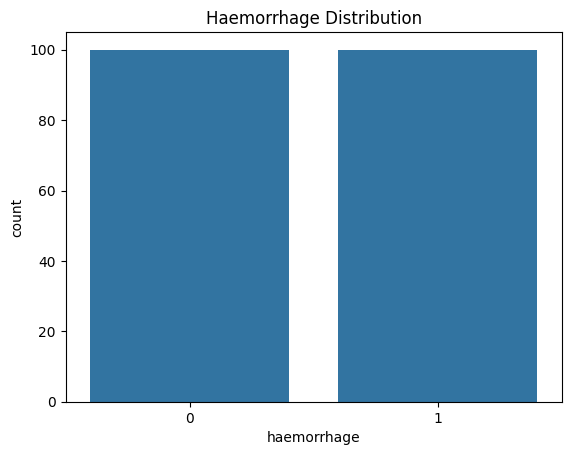

In [7]:
sns.countplot(data = labels, x = 'haemorrhage').set(title = 'Haemorrhage Distribution')

Looks like there are 100 haemorrhages and 100 non haemorhages in our dataset

In [8]:
# Lets check the image sizes are the same.

In [9]:
from os import scandir
import imageio.v3 as iio

scan_dist = []

for im_path in glob.glob('/content/drive/MyDrive/Colab Data/Haemhorrage/CT_Images/*.png'):
  im = iio.imread(im_path)
  scan_dist.append(im.shape)

print(len(scan_dist))
print(scan_dist[0])

200
(288, 231, 3)


In [10]:
scan_dist_df = pd.DataFrame(scan_dist)

In [11]:
scan_dist_df.head(1)

,0,1,2
0,288,231,3


<Axes: xlabel='0', ylabel='1'>

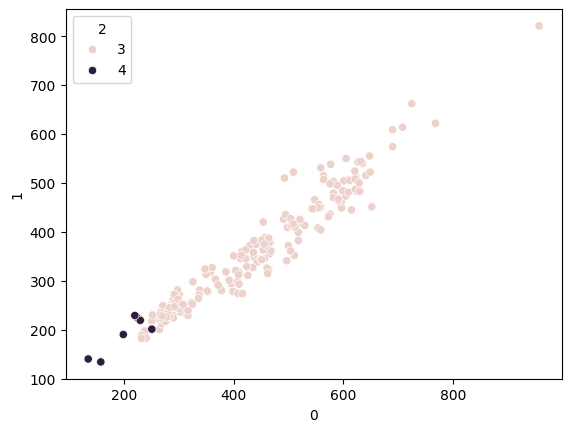

In [12]:
sns.scatterplot(data = scan_dist_df, x = 0, y = 1, hue = 2)

In [13]:
scan_dist_df[0].min()

135

In [14]:
scan_dist_df[1].min()

134

In [15]:
# so there is a lot of variation in the image sizes

now lets have a look at some images

In [16]:
files = sorted(glob.glob('/content/drive/MyDrive/Colab Data/Haemhorrage/CT_Images/*.png'))
images = np.array([cv2.imread(path) for path in files], dtype = object)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
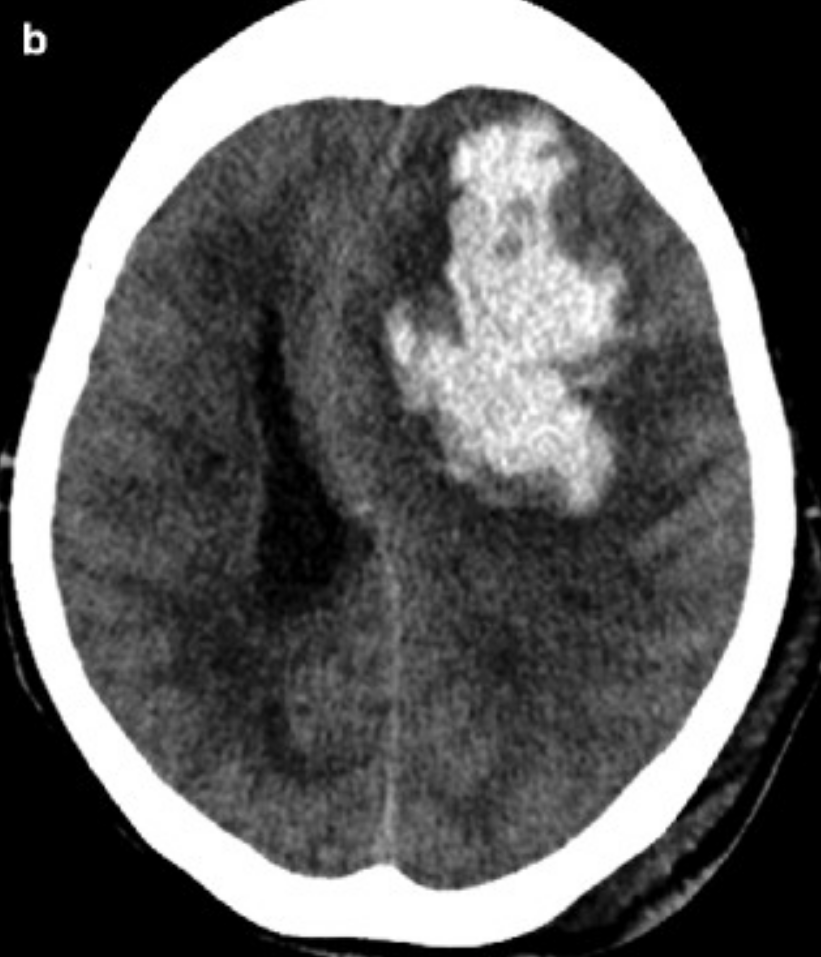

In [17]:
images[0]

In [18]:
# lets resize some images and make sure that we have the same shape for them all.

In [19]:
images = np.array([cv2.resize(image, (128, 128)) for image in images])

In [20]:
resize_plot = []

for i in images:
  resize_plot.append(i.shape)

len(resize_plot)


200

<Axes: xlabel='0', ylabel='1'>

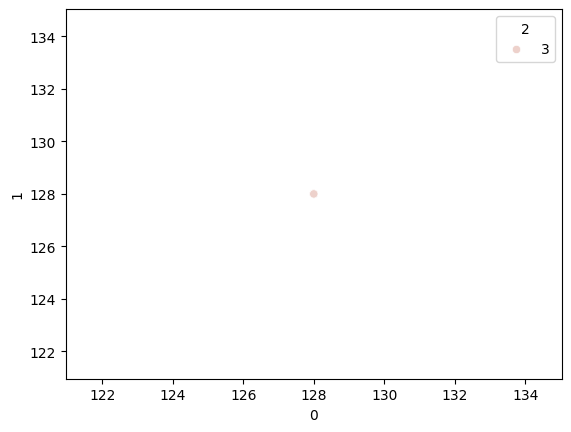

In [21]:
resize_plot_df = pd.DataFrame(resize_plot)
sns.scatterplot(data = resize_plot_df, x = 0, y = 1, hue = 2)

In [22]:
# looks like the images have all been resized appropriately

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
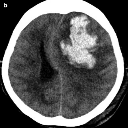

In [23]:
images[0]

In [24]:
images.shape


(200, 128, 128, 3)

# Split data

Lets Split our data into test and train

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X = images
y = labels

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [28]:
print(len(X_train))
print(len(y_train))

160
160


In [29]:
print(len(X_test))
print(len(y_test))

40
40


lets have a look at the distribution of the haemorrhages and non-haemhorrages

In [30]:
y_train.head(1)

,haemorrhage
id,
79,1


<Axes: xlabel='haemorrhage', ylabel='count'>

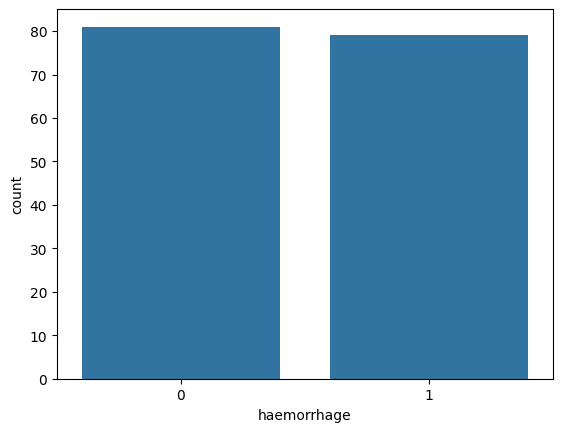

In [31]:
sns.countplot(data = y_train, x = 'haemorrhage')

<Axes: xlabel='haemorrhage', ylabel='count'>

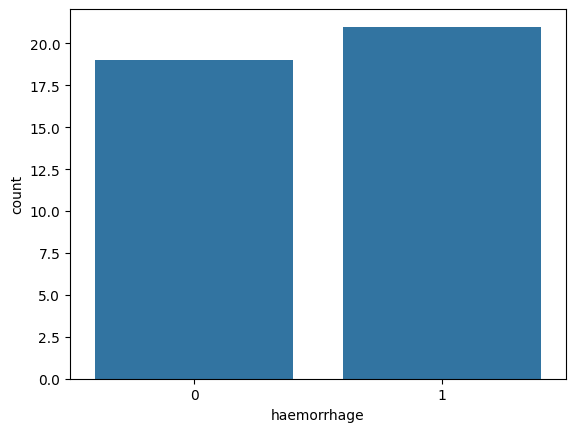

In [32]:
sns.countplot(data = y_test, x = 'haemorrhage')

looks as though the test and training data are roughly balanced in proportions of haemorrhages and non-haemorrhages

# Model 1

Let's Create Our Model

In [33]:
tf.random.set_seed(42)

haemorrhage_model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(128,128,3)),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

haemorrhage_model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                            optimizer = tf.keras.optimizers.Adam(),
                            metrics = ['accuracy'])

history_1 = haemorrhage_model_1.fit(X_train, y_train, epochs = 50, verbose = 0)

<Axes: >

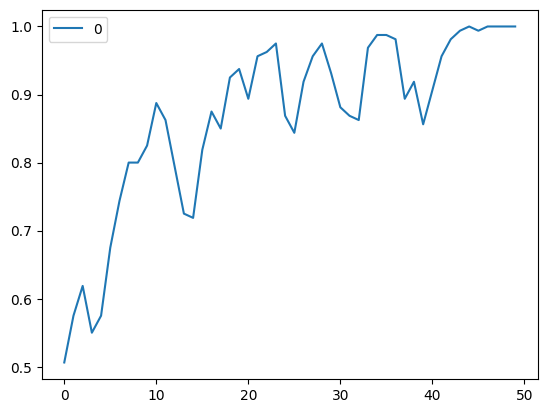

In [34]:
pd.DataFrame(history_1.history['accuracy']).plot()

In [35]:
haemorrhage_model_1.evaluate(x = X_test, y = y_test)

2/2 [==============================] - 0s 34ms/step - loss: 129.9999 - accuracy: 0.6750


[129.9999237060547, 0.675000011920929]

Accuracy is around 75-80 percent which is not too bad for a small data set

# 2nd Model

There are definitely some things that we can try to do to improve our model before we bring out a CNN model.

1. Normalise and Scale out data
2. Check the learning rate of our optimizer is at a good level (not over or under fitting)
3. Increase the number of layers


Let's start by scaling the data

In [36]:
images.max()

255

In [37]:
images.min()

0

In [38]:
# so i am going to scale the data to values between 0 and 1.

In [39]:
scale_fn = lambda x: x/255.0

v_func = np.vectorize(scale_fn)

X_train_scale = v_func(X_train)

X_test_scale = v_func(X_test)

In [40]:
# lets create model 2 and try it with this new scaled data

tf.random.set_seed(42)

model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (128,128,3)),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation ='relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_2.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = tf.keras.losses.BinaryCrossentropy(),
                metrics = ['accuracy'])

history_2 = model_2.fit(X_train_scale, y_train, epochs = 50, verbose = 0)

<Axes: >

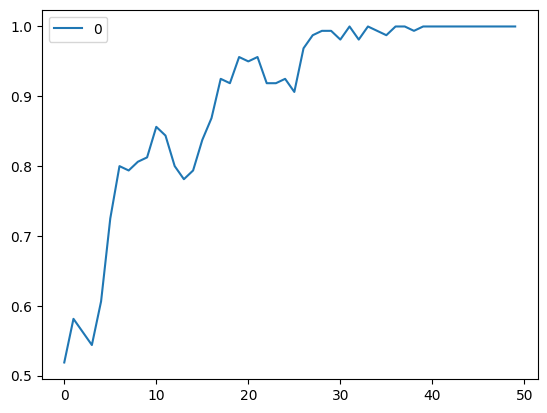

In [41]:
pd.DataFrame(history_2.history['accuracy']).plot()

In [42]:
model_2.evaluate(X_test_scale, y_test)

2/2 [==============================] - 0s 10ms/step - loss: 1.2002 - accuracy: 0.7250


[1.2002495527267456, 0.7250000238418579]

In [43]:
# It seems that scaling the data has had a small impact on its accuracy.

In [44]:
# Let's have a look at optimising the learning rate

# Model 3

lets use our scaled data for this exercise

In [45]:
tf.random.set_seed(42)

model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (128,128,3)),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_3.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                loss = tf.keras.losses.BinaryCrossentropy(),
                metrics = ['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history_3 = model_3.fit(X_train_scale, y_train, epochs = 100, verbose = 0, callbacks = [lr_scheduler])

Text(0.5, 0, 'epochs')

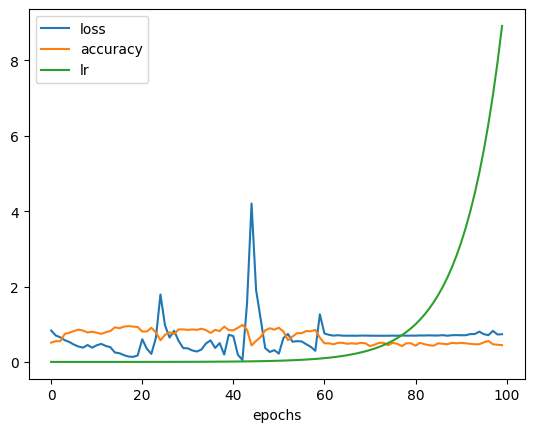

In [46]:
pd.DataFrame(history_3.history).plot()
plt.xlabel('epochs')

Text(0, 0.5, 'Loss')

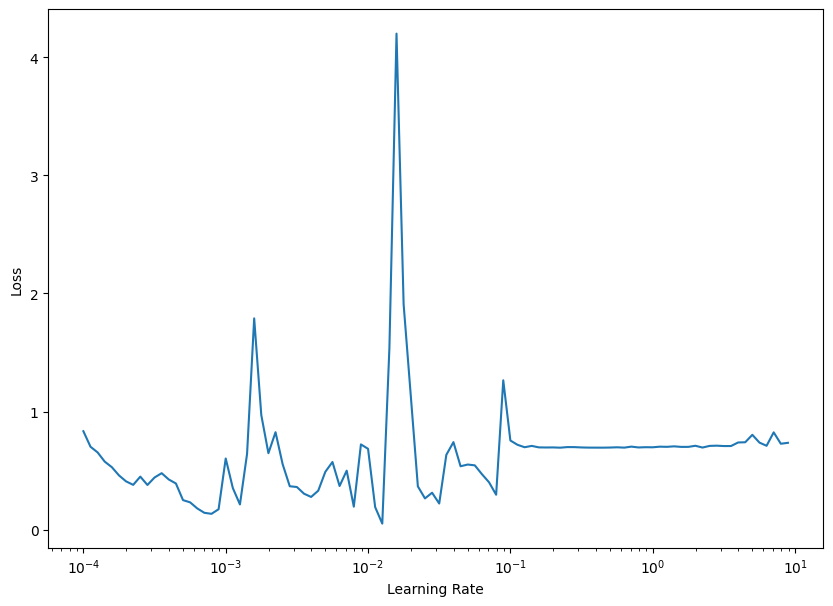

In [47]:
lrs = 1e-4 * 10**(tf.range(100)/20)

plt.figure(figsize = (10, 7))
plt.semilogx(lrs, history_3.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')

looks like the optimal lr is 0.001 which is the adam default lr, so I will not modify that now.

lets look now at adding a layer to see if that can help us with our accuracy

# Model 4

In [48]:
tf.random.set_seed(42)

model_4 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(128,128,3)),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_4.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = tf.keras.losses.BinaryCrossentropy(),
                metrics = ['accuracy'])

history_4 = model_4.fit(X_train_scale, y_train, epochs = 50, verbose=0)

<Axes: >

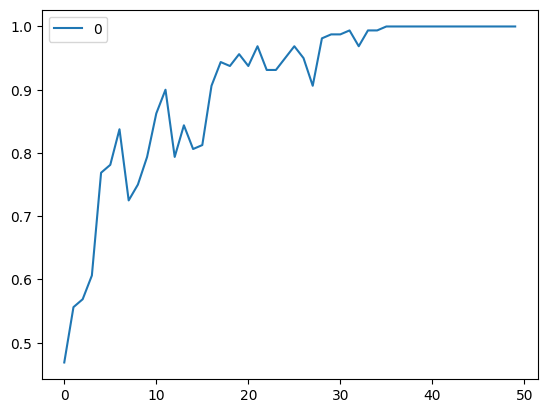

In [49]:
pd.DataFrame(history_4.history['accuracy']).plot()

In [50]:
model_4.evaluate(X_test_scale, y_test)

2/2 [==============================] - 0s 11ms/step - loss: 1.2592 - accuracy: 0.7500


[1.2592086791992188, 0.75]

So that seems to have improved our model's accuracy a small amount

Lets have a look now and see if increasing the number of neurones in the hidden layers imporves the accuracy

# Model 5

In [52]:
tf.random.set_seed(42)

model_5 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (128,128,3)),
    tf.keras.layers.Dense(200, activation = 'relu'),
    tf.keras.layers.Dense(200, activation = 'relu'),
    tf.keras.layers.Dense(200, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_5.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = ['binary_crossentropy'],
                metrics =['accuracy'])

history_5 = model_5.fit(X_train_scale, y_train, epochs = 50, verbose = 0)

<Axes: >

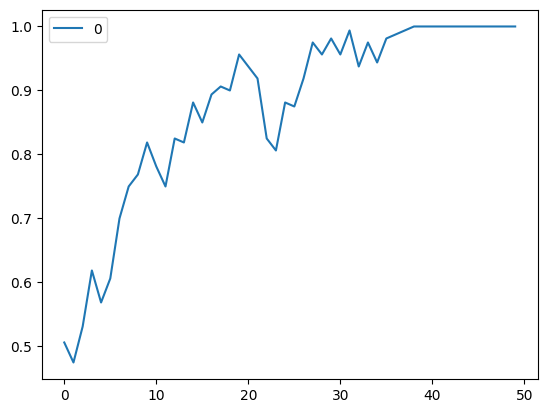

In [53]:
pd.DataFrame(history_5.history['accuracy']).plot()

In [54]:
model_5.evaluate(X_test_scale, y_test)

2/2 [==============================] - 0s 10ms/step - loss: 1.4698 - accuracy: 0.7000


[1.4697825908660889, 0.699999988079071]

So that hasnt made any difference to the accuracy but has taken a while to train the model, so more pain no gain there.

I think that we may have exhausted our possibilities here with the traditional model, lets try the CNN now and see how much that improves our accuracy.

# Let's try and push this some more with a CNN

In [67]:
# 1st CNN Model

tf.random.set_seed(42)

CNN_model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size = 3,
                           activation = 'relu',
                           input_shape = (128,128,3)),
    tf.keras.layers.Conv2D(10,3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = 2,
                              padding = 'valid'),
    tf.keras.layers.Conv2D(10,3, activation = 'relu'),
    tf.keras.layers.Conv2D(10,3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

CNN_model_1.compile(optimizer = tf.keras.optimizers.Adam(),
                    loss = ['binary_crossentropy'],
                    metrics = ['accuracy'])

CNN_Hx_1 = CNN_model_1.fit(X_train_scale, y_train, epochs = 5, verbose = 0)

<Axes: >

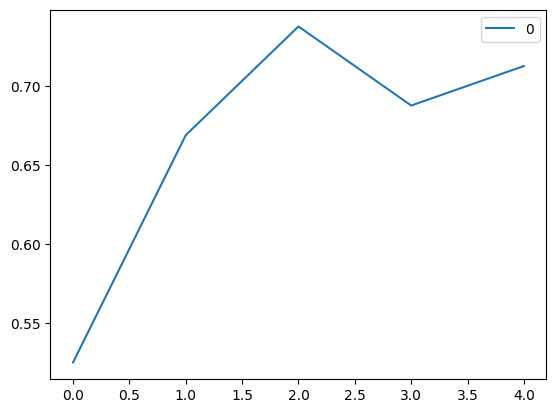

In [68]:
pd.DataFrame(CNN_Hx_1.history['accuracy']).plot()

In [69]:
CNN_model_1.evaluate(X_test_scale, y_test)

2/2 [==============================] - 0s 9ms/step - loss: 0.4584 - accuracy: 0.7750


[0.4583827555179596, 0.7749999761581421]

# Hmmm seems like we're struggling to get our accuracy above 75%, this could be because our data set is quite small at the moment.
# In the next project I will take a larger data set and try and improve upon the accuracy we're seeing here.